# Postprocessing
This notebook shall evaluate the performance of the trained model in terms of accuracy and false discovery rate.
To do this, we will plot the accuracy over the training process and a ROC curve to evaluate precision and recall.

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

## Load the information from previous training

In [2]:
date_string = '2016_08_16_07_13_38'
with open('training/' + date_string + '/accuracies.pkl', 'r') as f:
    test_acc, train_acc, test_ce = pickle.load(f)

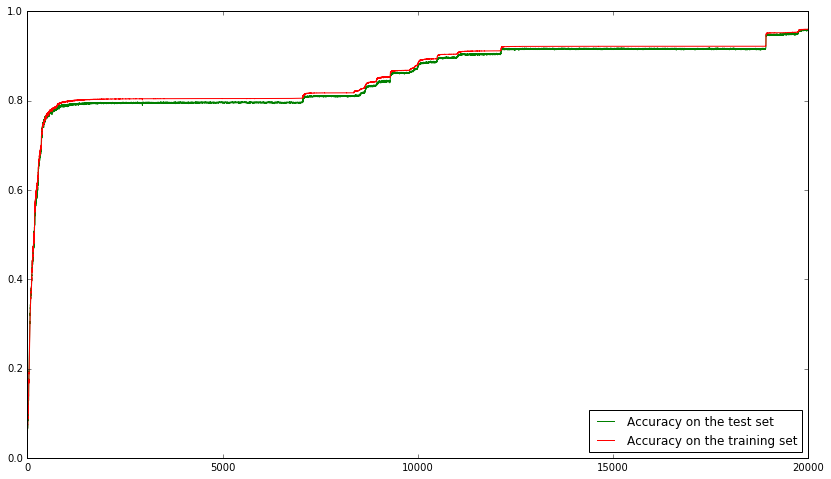

In [3]:
%matplotlib inline
fig = plt.figure(figsize=(14,8))
plt.plot(test_acc, color='green', label='Accuracy on the test set')
plt.plot(train_acc, color='red', label='Accuracy on the training set')
plt.legend(loc="lower right")

In [4]:
print "Final Accuracy on Test Set: " + str(test_acc[-1])
print "Final Accuracy on Training Set: " + str(train_acc[-1])

Final Accuracy on Test Set: 0.957216493478
Final Accuracy on Training Set: 0.959999993062


## Plot ROC curve

In [5]:
import cnn

# load test set
with open('test_data_gray_norm_aug.pkl', 'rb') as test_handle:
    test_set, test_labels = pickle.load(test_handle)

path_to_model = 'training/' + date_string + '/model.ckpt'
model = cnn.cNN()
print test_set.shape
print test_labels.shape
predictions = model.load_model_and_evaluate('training/2016_08_16_07_13_38/model.ckpt', test_set)

(3891, 32, 32, 1)
(3891, 43)
Model successfully loaded!


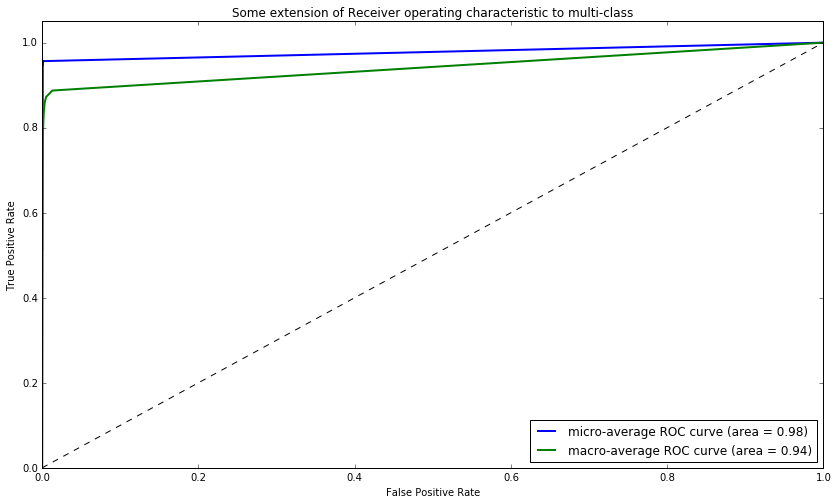

In [13]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for c in range(model.n_classes):
    fpr[c], tpr[c], _ = roc_curve(y_true=test_labels[:, c], y_score=predictions[:, c])
    roc_auc[c] = auc(fpr[c], tpr[c])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_labels.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(model.n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(model.n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= model.n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(14, 8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         linewidth=2)

#for i in range(model.n_classes):
#    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
#                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()